**Instituto de Informática - UFG**

Disciplina: Inteligência Computacional

Prof. Cedric Luiz de Carvalho

---

Aluna(o): Arthur Gomes de Siqueira

Aluna(o): Ricardo Ataide de Oliveira Junior

---

Grupo ( D )

---

Papel no grupo: 
Ricardo Ataide - Engenheiro de conhecimento
---

#Especificação do problema : Algoritmos genéticos

Os anos de 2020 e 2021 estão sendo anos trágicos. Mais de 156 milhões de pessoas já foram infectadas e mais de 3,25 milhões de pessoas já morreram acometidas pela COVID-19 no mundo. Um grande número de cientistas está trabalhando com afinco para produzir medicamentos que possam minimizar os efeitos do vírus. Um dos fatores que pode influenciar a maior ou menor gravidade da manifestação doença nos pacientes infectados pelo vírus é a sua alimentação.

Utilizando as bases de [dados sobre a alimentação](https://www.kaggle.com/mariaren/covid19-healthy-diet-dataset), implemente uma ferramenta computacional, que aplique a técnica de algoritmos genéticos para identificar a melhor dieta alimentar que possa minimizar os efeitos da doença.



## O trabalho

O trabalho deve ser feito em grupos, conforme definido. Cada grupo deverá entregar apenas um produto final para ser avaliado pelo professor. Apesar do trabalho ser feito em grupos, a avaliação de cada aluno será feita individualmente.


**Recomendações:**

   O primeiro passo para resolver um problema é entendê-lo muito bem, considerar o contexto e fazer as abstrações necessárias. A seguir, para não "reinventar a roda" é preciso identificar como a comunidade resolveu o problema em questão, ou problemas parecidos, cuja solução possa ser mapeada para situação em análise. Desta forma, deve ser feito um estudo, o mais amplo possível sobre esse assunto. O próximo passo é o grupo se reunir e instanciar o modelo em estudo para o caso específico do problema a ser resolvido. Em paralelo, uma análise rigorosa deve ser feita na base de dados a fim de prepará-la para seu uso no modelo. Finalmente, com o modelo bem compreendido e instanciado e os dados devidamente preparados, a implementação do modelo pode ser feita.

## Divisão de papéis:

* **Analista de dados:** deverá ficar responsável por fazer uma "Análise Exploratória de Dados" (AED), analisando a base de dados fornecida e preparando-a para ser usada na solução do problema. Esta análise deve produzir diversos gráficos que pemitam uma visão geral do comportamento dos dados.

* **Engenheiro de conhecimento:** deverá produzir a solução para o problema, utilizando a técnica estudada, o modelo proposto pelo grupo e a base de dados preparada pelo analista de dados.



### Primeira etapa:

(1) **Notebook descrevendo detalhadamente o modelo:**
* Um modelo é uma representação abstrata do mundo. No nosso caso, o "mundo" é o contexto onde o problema se insere. Desta forma, deve ser analisado com cuidado o que deve e o que não deve ser considerado. Por exemplo, se a base de dados tem 30 colunas, todas elas deverão ser utilizadas na implementação? Algumas poderão ser desconsideradas? Por quê?
* Para utilizar a técnica em estudo, é preciso conhecê-la muito bem. Assim, nesta etapa, **deve ser feita uma descrição detalhada do problema e da técnica a ser utilizada.**
* Deve ser elaborado um modelo com base na técnica em estudo.
* O notebook, descrevendo o problema, a técnica em questão e o modelo elaborado deverá ser submetido na Plataforma Turing, até dia 03/11/2021. Os modelos serão discutidos com a turma no dia 04/11/2021.

### Segunda etapa:

(2) **Notebook contendo a Análise Exploratória dos Dados**

(3) **Notebook contendo a solução para o problema** 

(4) **Um vídeo explicando detalhadamente como a técnica estudada foi utilizada para resolver o problema proposto** . O vídeo NÃO deve ser uma apresentação do notebook nem deve apresentar detalhes de codificação. Deve trazer uma descrição do problema, do modelo utilizado e da solução desenvolvida, de preferência utilizando slides ou algo parecido. Preferencialmente, o grupo deve enviar um *link* para o local onde o vídeo está armazenado.


**Observação:** poderão ser utilizados códigos desenvolvidos pelo grupo e/ou códigos de terceiros. No caso de se usar códigos desenvolvidos por terceiros, o autor desses códigos deve ser devidamente referenciado e os códigos devem ser devidamente documentados (comentários no próprio código e fora dele).

Os produtos da segunda etapa deverão ser submetidos na Plataforma Turing até 09/11/2021.
 

# Analise Exploratoria dos dados

## 1. Obter a base de dados

In [ ]:
#Fazendo upload dos arquivos
from google.colab import files
uploaded = files.upload()

Saving dataset.csv to dataset.csv
Saving data_protein.csv to data_protein.csv
Saving data_kg.csv to data_kg.csv
Saving data_kcal.csv to data_kcal.csv
Saving data_fat.csv to data_fat.csv


# 2. Carga dos dados

In [ ]:
kg = pd.read_csv('data_kg.csv')
kg = kg.drop(columns=('Unnamed: 0'))
kg

,Alcoholic Beverages (KG),Animal fats (KG),Animal Products (KG),"Aquatic Products, Other (KG)",Cereals - Excluding Beer (KG),Eggs (KG),"Fish, Seafood (KG)",Fruits - Excluding Wine (KG),Meat (KG),Milk - Excluding Butter (KG),Miscellaneous (KG),Offals (KG),Oilcrops (KG),Pulses (KG),Spices (KG),Starchy Roots (KG),Stimulants (KG),Sugar & Sweeteners (KG),Sugar Crops (KG),Treenuts (KG),Vegetable Oils (KG),Vegetables (KG),Vegetal Products (KG)
0,0.0014,0.1973,9.4341,0.0000,24.8097,0.2099,0.0350,5.3495,1.2020,7.5828,0.0728,0.2057,0.0700,0.2953,0.0574,0.8802,0.3078,1.3489,0.000,0.0770,0.5345,6.7642,40.5645
1,1.6719,0.1357,18.7684,0.0000,5.7817,0.5815,0.2126,6.7861,1.8845,15.7213,0.1123,0.2324,0.9377,0.2380,0.0008,1.8096,0.1055,1.5367,0.000,0.1515,0.3261,11.7753,31.2304
2,0.2711,0.0282,9.6334,0.0000,13.6816,0.5277,0.2416,6.3801,1.1305,7.6189,0.1671,0.0870,0.3493,0.4783,0.0557,4.1340,0.2216,1.8342,0.000,0.1152,1.0310,11.6484,40.3651
3,5.8087,0.0560,4.9278,0.0000,9.1085,0.0587,1.7707,6.0005,2.0571,0.8311,0.1165,0.1550,0.4186,0.6507,0.0009,18.1102,0.0508,1.8495,0.000,0.0061,0.6463,2.3041,45.0722
4,3.5764,0.0087,16.6613,0.0000,5.9960,0.2274,4.1489,10.7451,5.6888,6.3663,0.7139,0.2219,0.2172,0.1840,0.1524,1.4522,0.1564,3.8749,0.000,0.0253,0.8102,5.4495,33.3233
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165,2.5952,0.0403,14.7565,0.0000,12.9253,0.3389,0.9456,7.6460,3.8328,9.3920,0.0702,0.2078,0.0281,0.3342,0.0009,2.5643,0.1479,3.4106,0.000,0.0009,1.3734,4.1474,35.2416
166,1.4591,0.1640,8.5765,0.0042,16.8740,0.3077,2.6392,5.9029,4.4382,0.6069,0.0126,0.4149,0.8410,0.2032,0.2074,1.0596,0.2880,1.2846,0.815,0.3070,0.2201,11.9508,41.4232
167,0.0364,0.0446,5.7874,0.0000,27.2077,0.2579,0.5240,5.1344,2.7871,1.8911,0.2033,0.2827,0.0893,0.8645,0.0347,1.0794,0.2199,5.0468,0.000,0.0017,1.0811,3.2135,44.2126
168,5.7360,0.0829,6.0197,0.0000,21.1938,0.3399,1.6924,1.0183,1.8427,1.7570,0.2149,0.3048,1.8736,0.1756,0.0478,7.9649,0.0618,1.5632,0.000,0.0014,0.6657,3.4649,43.9789


In [ ]:
dataset = pd.read_csv('dataset.csv')

In [ ]:

#dataset = dataset.drop(columns=('Unnamed: 0'))
dataset = dataset.drop(columns=("Country"))
dataset

,Unnamed: 0,Obesity,Confirmed,Deaths,Recovered,Active,Population,Undernourished,Alcoholic Beverages (Fat),Animal Products (Fat),Animal fats (Fat),"Aquatic Products, Other (Fat)",Cereals - Excluding Beer (Fat),Eggs (Fat),"Fish, Seafood (Fat)",Fruits - Excluding Wine (Fat),Meat (Fat),Miscellaneous (Fat),Milk - Excluding Butter (Fat),Offals (Fat),Oilcrops (Fat),Pulses (Fat),Spices (Fat),Starchy Roots (Fat),Stimulants (Fat),Sugar Crops (Fat),Sugar & Sweeteners (Fat),Treenuts (Fat),Vegetal Products (Fat),Vegetable Oils (Fat),Vegetables (Fat),Alcoholic Beverages (Kcal),Animal Products (Kcal),Animal fats (Kcal),"Aquatic Products, Other (Kcal)",Cereals - Excluding Beer (Kcal),Eggs (Kcal),"Fish, Seafood (Kcal)",Fruits - Excluding Wine (Kcal),Meat (Kcal),...,"Fish, Seafood (KG)",Fruits - Excluding Wine (KG),Meat (KG),Milk - Excluding Butter (KG),Miscellaneous (KG),Offals (KG),Oilcrops (KG),Pulses (KG),Spices (KG),Starchy Roots (KG),Stimulants (KG),Sugar & Sweeteners (KG),Sugar Crops (KG),Treenuts (KG),Vegetable Oils (KG),Vegetables (KG),Vegetal Products (KG),Alcoholic Beverages (Protein),Animal Products (Protein),Animal fats (Protein),"Aquatic Products, Other (Protein)",Cereals - Excluding Beer (Protein),Eggs (Protein),"Fish, Seafood (Protein)",Fruits - Excluding Wine (Protein),Meat (Protein),Milk - Excluding Butter (Protein),Offals (Protein),Oilcrops (Protein),Pulses (Protein),Spices (Protein),Starchy Roots (Protein),Stimulants (Protein),Sugar Crops (Protein),Sugar & Sweeteners (Protein),Treenuts (Protein),Vegetal Products (Protein),Vegetable Oils (Protein),Vegetables (Protein),Miscellaneous (Protein)
0,0,4.5,0.142134,0.006186,0.123374,0.012574,38928000.0,29.8,0.0000,21.6397,6.2224,0.0,8.0353,0.6859,0.0327,0.4246,6.1244,0.0163,8.2803,0.3103,1.0452,0.1960,0.2776,0.0490,0.0980,0.0000,0.0,0.7513,28.3684,17.0831,0.3593,0.0000,4.7774,0.8504,0.0,37.1186,0.1501,0.0000,1.4757,1.2006,...,0.0350,5.3495,1.2020,7.5828,0.0728,0.2057,0.0700,0.2953,0.0574,0.8802,0.3078,1.3489,0.000,0.0770,0.5345,6.7642,40.5645,0.0000,9.7523,0.0277,0.0000,35.9771,0.4067,0.0647,0.5824,3.1337,5.5278,0.5916,0.2034,1.2479,0.1664,0.1941,0.5546,0.0000,0.0000,0.1387,40.2477,0.0000,1.1370,0.0462
1,1,22.3,2.967301,0.050951,1.792636,1.123714,2838000.0,6.2,0.0000,32.0002,3.4172,0.0,2.6734,1.6448,0.1445,0.6418,8.7428,0.0170,17.7576,0.2933,3.1622,0.1148,0.0000,0.0510,0.5270,0.0000,0.0,0.9181,17.9998,9.2443,0.6503,0.9120,16.0930,1.0591,0.0,16.2107,0.8091,0.1471,3.8982,3.8688,...,0.2126,6.7861,1.8845,15.7213,0.1123,0.2324,0.9377,0.2380,0.0008,1.8096,0.1055,1.5367,0.000,0.1515,0.3261,11.7753,31.2304,0.1840,27.7469,0.0711,0.0000,14.2331,1.8069,0.6274,1.2757,7.6582,16.4750,1.1084,0.3722,1.4555,0.0000,0.8867,0.2635,0.0000,0.0042,0.2677,22.2552,0.0084,3.2456,0.0544
2,2,26.6,0.244897,0.006558,0.167572,0.070767,44357000.0,3.9,0.0000,14.4175,0.8972,0.0,4.2035,1.2171,0.2008,0.5772,3.8961,0.0439,8.0934,0.1067,1.1983,0.2698,0.1568,0.1129,0.2886,0.0000,0.0,0.8595,35.5857,27.3606,0.5145,0.0896,6.0326,0.1941,0.0,25.0112,0.4181,0.1195,3.1805,1.2543,...,0.2416,6.3801,1.1305,7.6189,0.1671,0.0870,0.3493,0.4783,0.0557,4.1340,0.2216,1.8342,0.000,0.1152,1.0310,11.6484,40.3651,0.0323,13.8360,0.0054,0.0000,26.5633,1.2916,0.6350,1.1624,3.5088,8.0616,0.3283,0.1830,2.5509,0.1776,1.4638,0.4628,0.0000,0.0000,0.2745,36.1694,0.0269,3.1267,0.1399
3,3,6.8,0.061687,0.001461,0.056808,0.003419,32522000.0,25.0,0.0000,15.3041,1.3130,0.0,6.5545,0.1539,1.4155,0.3488,11.0268,0.0308,1.2309,0.1539,3.9902,0.3282,0.0103,0.7078,0.1128,0.0000,0.0,0.0308,34.7010,22.4638,0.1231,1.9388,4.6927,0.2644,0.0,18.3521,0.0441,0.8372,2.3133,2.9302,...,1.7707,6.0005,2.0571,0.8311,0.1165,0.1550,0.4186,0.6507,0.0009,18.1102,0.0508,1.8495,0.000,0.0061,0.6463,2.3041,45.0722,0.6285,15.2311,0.0277,0.0000,20.3882,0.1756,5.4436,1.2754,7.6248,1.1460,0.8133,2.1534,4.0850,0.0000,5.1941,0.1017,0.0000,0.0092,0.0092,34.7782,0.0092,0.8133,0.0924
4,5,28.5,4.356147,0.108227,3.905192,0.342729,45377000.0,4.6,0.0000,30.3572,3.3076,0.0,1.3316,1.5706,0.1664,0.20

# Implementação

In [ ]:
!pip install geneticalgorithm

## 2. Definição da função objetivo

In [ ]:
qntd_variaveis=len(kg.columns)

In [ ]:
qntd_variaveis

23

In [ ]:
kg.columns

Index(['Alcoholic Beverages (KG)', 'Animal fats (KG)', 'Animal Products (KG)',
       'Aquatic Products, Other (KG)', 'Cereals - Excluding Beer (KG)',
       'Eggs (KG)', 'Fish, Seafood (KG)', 'Fruits - Excluding Wine (KG)',
       'Meat (KG)', 'Milk - Excluding Butter (KG)', 'Miscellaneous (KG)',
       'Offals (KG)', 'Oilcrops (KG)', 'Pulses (KG)', 'Spices (KG)',
       'Starchy Roots (KG)', 'Stimulants (KG)', 'Sugar & Sweeteners (KG)',
       'Sugar Crops (KG)', 'Treenuts (KG)', 'Vegetable Oils (KG)',
       'Vegetables (KG)', 'Vegetal Products (KG)'],
      dtype='object')

A nossa primeira parte da função objetivo será uma função linear sobre a quantidade de alimentos.

In [ ]:
import numpy as np

#Gerando uma população aleatoriamente
np.random.seed(seed=2021) # Usar um seed para dar reprodutibilidade
pesos = np.random.rand(qntd_variaveis)

#Relacionando a população com os dados do dataset escolhido para a analise inicial.
#Faz o produto escalar entre os pesos dos alimentos e o peso da população gerada
def objetive_function(qnt_kg):
    return np.dot(qnt_kg, pesos)

In [ ]:
print(len(kg.columns))
print(len(kcal.columns))
print(len(protein.columns))
print(len(fat.columns))


23
23
23
23


### 2.1 Definição do fitness

Podemos definir as retrições na tentativa de identificar uma métrica de fintness aplicada por meio de **penalidades**, ou seja, se o modelo desobedecer a restrição terá uma penalidade no valor de sua função objetivo. Desta forma, soluções que não respeitarem as restrições irão sofrer penalidades e não serão soluções ótimas.

#### 2.1.1 Função auxiliar encontrar o país mais semelhante usando similaridade cosseno

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

def find_most_similar_country(qnt_kg):
    #utiliza a função cosine_similarity para avalir o quao "parecido" e um pais dos dados desejados
    kg_normalizado = kg/100 # dividir o percentual por 100 para normalizar
    countries_similarities = cosine_similarity([qnt_kg], kg_normalizado) #Busca o pais mais proximo do objetivo
    value = countries_similarities.max() # encontra o valor maximo de similaridade
    
    i, j = np.where(np.isclose(countries_similarities, value)) # identifica o index do país similar

    country_index = j
    return country_index # retorna o país encontrado

### 2.2 Penalidades

Para implementar as penalidades nós utilizamos algumas informações da tabela que julgamos ser as mais cruciais em relação ao novo coronavirus. Nós levamos em consideração uma série de fatores visando minimizar principalmente casos de morte de pacientes pelo vírus, em segundo lugar novos casos confirmados de infecção causada pelo vírus e por fim problemas de saúde que são considerados comorbidades e levam o paciente ao grupo de risco da doença, que são obesidade e desnutrição.

Para isso analisamos a distribuição destes dados na base de dados e verificamos principalmente o valor da média, que será usado como parâmetro nas restrições de penalidades. Assim, abaixo podemos constatar as distribuições de cada uma das informações citadas:

### Implementando Penalidades

Abaixo é implementado a função de penalidades, sendo levadas em consideração as médias das seguintes características ordenadas por grau de seus pesos:
- Maior peso: Quantidade de mortes;
- Segundo maior peso: Quantidade de casos confirmados;
- Terceiro maior peso: Obesidade;
- Quarto e menor peso: Desnutrição;

Ou seja, vamos dar uma penalidade maior para mortes e casos confirmados, do que para os valores de obesidade e desnutrição.

In [ ]:
def penalties(qnt_kg):
    penalty = 0
    obesidade_md = dataset.Obesity.mean()
    mortes_md = dataset.Deaths.mean()
    confirmados_md = dataset.Confirmed.mean()
    desnutr_md = dataset.Undernourished.mean()
    most_similar = find_most_similar_country(qnt_kg)

    most_similar = most_similar[0].item()

    if most_similar >= 154:
      country = dataset.iloc[most_similar - 154]
    
    else:
      country = dataset.iloc[most_similar]

    #se a taxa de obesidade for acima da média, então ocorre uma punição
    if country[1] > obesidade_md:
      penalty += 10 
    
    #se a taxa de casos confirmados for acima da média, então ocorre uma punição
    if country[2] > confirmados_md:
        penalty += 20
    
    #se a taxa de mortes confirmadas for acima da média, então ocorre uma punição
    if country[3] > mortes_md:
        penalty += 40
    
    #se a taxa de desnutrição for acima da média, então ocorre uma punição
    if country[7] > desnutr_md:
        penalty += 5

    return penalty

## 3. Executar algoritmo genético

Apresentando a base de dados levada em consideração para o cálculo da solução:

In [ ]:
(dataset)

,Unnamed: 0,Obesity,Confirmed,Deaths,Recovered,Active,Population,Undernourished,Alcoholic Beverages (Fat),Animal Products (Fat),Animal fats (Fat),"Aquatic Products, Other (Fat)",Cereals - Excluding Beer (Fat),Eggs (Fat),"Fish, Seafood (Fat)",Fruits - Excluding Wine (Fat),Meat (Fat),Miscellaneous (Fat),Milk - Excluding Butter (Fat),Offals (Fat),Oilcrops (Fat),Pulses (Fat),Spices (Fat),Starchy Roots (Fat),Stimulants (Fat),Sugar Crops (Fat),Sugar & Sweeteners (Fat),Treenuts (Fat),Vegetal Products (Fat),Vegetable Oils (Fat),Vegetables (Fat),Alcoholic Beverages (Kcal),Animal Products (Kcal),Animal fats (Kcal),"Aquatic Products, Other (Kcal)",Cereals - Excluding Beer (Kcal),Eggs (Kcal),"Fish, Seafood (Kcal)",Fruits - Excluding Wine (Kcal),Meat (Kcal),...,"Fish, Seafood (KG)",Fruits - Excluding Wine (KG),Meat (KG),Milk - Excluding Butter (KG),Miscellaneous (KG),Offals (KG),Oilcrops (KG),Pulses (KG),Spices (KG),Starchy Roots (KG),Stimulants (KG),Sugar & Sweeteners (KG),Sugar Crops (KG),Treenuts (KG),Vegetable Oils (KG),Vegetables (KG),Vegetal Products (KG),Alcoholic Beverages (Protein),Animal Products (Protein),Animal fats (Protein),"Aquatic Products, Other (Protein)",Cereals - Excluding Beer (Protein),Eggs (Protein),"Fish, Seafood (Protein)",Fruits - Excluding Wine (Protein),Meat (Protein),Milk - Excluding Butter (Protein),Offals (Protein),Oilcrops (Protein),Pulses (Protein),Spices (Protein),Starchy Roots (Protein),Stimulants (Protein),Sugar Crops (Protein),Sugar & Sweeteners (Protein),Treenuts (Protein),Vegetal Products (Protein),Vegetable Oils (Protein),Vegetables (Protein),Miscellaneous (Protein)
0,0,4.5,0.142134,0.006186,0.123374,0.012574,38928000.0,29.8,0.0000,21.6397,6.2224,0.0,8.0353,0.6859,0.0327,0.4246,6.1244,0.0163,8.2803,0.3103,1.0452,0.1960,0.2776,0.0490,0.0980,0.0000,0.0,0.7513,28.3684,17.0831,0.3593,0.0000,4.7774,0.8504,0.0,37.1186,0.1501,0.0000,1.4757,1.2006,...,0.0350,5.3495,1.2020,7.5828,0.0728,0.2057,0.0700,0.2953,0.0574,0.8802,0.3078,1.3489,0.000,0.0770,0.5345,6.7642,40.5645,0.0000,9.7523,0.0277,0.0000,35.9771,0.4067,0.0647,0.5824,3.1337,5.5278,0.5916,0.2034,1.2479,0.1664,0.1941,0.5546,0.0000,0.0000,0.1387,40.2477,0.0000,1.1370,0.0462
1,1,22.3,2.967301,0.050951,1.792636,1.123714,2838000.0,6.2,0.0000,32.0002,3.4172,0.0,2.6734,1.6448,0.1445,0.6418,8.7428,0.0170,17.7576,0.2933,3.1622,0.1148,0.0000,0.0510,0.5270,0.0000,0.0,0.9181,17.9998,9.2443,0.6503,0.9120,16.0930,1.0591,0.0,16.2107,0.8091,0.1471,3.8982,3.8688,...,0.2126,6.7861,1.8845,15.7213,0.1123,0.2324,0.9377,0.2380,0.0008,1.8096,0.1055,1.5367,0.000,0.1515,0.3261,11.7753,31.2304,0.1840,27.7469,0.0711,0.0000,14.2331,1.8069,0.6274,1.2757,7.6582,16.4750,1.1084,0.3722,1.4555,0.0000,0.8867,0.2635,0.0000,0.0042,0.2677,22.2552,0.0084,3.2456,0.0544
2,2,26.6,0.244897,0.006558,0.167572,0.070767,44357000.0,3.9,0.0000,14.4175,0.8972,0.0,4.2035,1.2171,0.2008,0.5772,3.8961,0.0439,8.0934,0.1067,1.1983,0.2698,0.1568,0.1129,0.2886,0.0000,0.0,0.8595,35.5857,27.3606,0.5145,0.0896,6.0326,0.1941,0.0,25.0112,0.4181,0.1195,3.1805,1.2543,...,0.2416,6.3801,1.1305,7.6189,0.1671,0.0870,0.3493,0.4783,0.0557,4.1340,0.2216,1.8342,0.000,0.1152,1.0310,11.6484,40.3651,0.0323,13.8360,0.0054,0.0000,26.5633,1.2916,0.6350,1.1624,3.5088,8.0616,0.3283,0.1830,2.5509,0.1776,1.4638,0.4628,0.0000,0.0000,0.2745,36.1694,0.0269,3.1267,0.1399
3,3,6.8,0.061687,0.001461,0.056808,0.003419,32522000.0,25.0,0.0000,15.3041,1.3130,0.0,6.5545,0.1539,1.4155,0.3488,11.0268,0.0308,1.2309,0.1539,3.9902,0.3282,0.0103,0.7078,0.1128,0.0000,0.0,0.0308,34.7010,22.4638,0.1231,1.9388,4.6927,0.2644,0.0,18.3521,0.0441,0.8372,2.3133,2.9302,...,1.7707,6.0005,2.0571,0.8311,0.1165,0.1550,0.4186,0.6507,0.0009,18.1102,0.0508,1.8495,0.000,0.0061,0.6463,2.3041,45.0722,0.6285,15.2311,0.0277,0.0000,20.3882,0.1756,5.4436,1.2754,7.6248,1.1460,0.8133,2.1534,4.0850,0.0000,5.1941,0.1017,0.0000,0.0092,0.0092,34.7782,0.0092,0.8133,0.0924
4,5,28.5,4.356147,0.108227,3.905192,0.342729,45377000.0,4.6,0.0000,30.3572,3.3076,0.0,1.3316,1.5706,0.1664,0.20

Implementando a função objetivo


 The best solution found:
 [0.06651524 0.00169297 0.07804668 0.03466418 0.01768563 0.05393865
 0.11313213 0.01770146 0.05583474 0.00301199 0.20779479 0.15680708
 0.04182643 0.01353096 0.02459422 0.05979062 0.00955416 0.00387768
 0.00419451 0.06732655 0.00886942 0.07337974 0.07056068]

 Objective function:
 0.3703151675971219


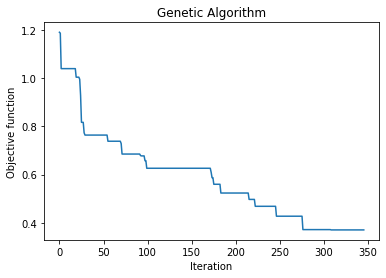

In [ ]:
from geneticalgorithm import geneticalgorithm as ga

varbound=np.array([[0,0.3]]*qntd_variaveis)
#a variavel qnt_kg é gerada pela propria biblioteca, sendo ela um array numpy com o limite definido acima
model = ga(
    function=lambda qnt_kg: penalties(qnt_kg) + objetive_function(qnt_kg), # função final é a função objetivo menos a penalidade
    dimension=qntd_variaveis,
    variable_type='real',
    variable_boundaries=varbound # pode comer entre 0...0.3 kg de cada tipo de alimento
)

model.run()

O modelo escolhido  possui os parâmetros padrões do pacote.

In [ ]:
model.param

{'crossover_probability': 0.5,
 'crossover_type': 'uniform',
 'elit_ratio': 0.01,
 'max_iteration_without_improv': None,
 'max_num_iteration': None,
 'mutation_probability': 0.1,
 'parents_portion': 0.3,
 'population_size': 100}

## 4. Solução

Desta forma, chegamos aos valores da dieta desejada

In [ ]:
result = [0.06651524, 0.00169297, 0.07804668, 0.03466418, 0.01768563, 0.05393865, 0.11313213, 0.01770146, 0.05583474, 0.00301199, 0.20779479, 0.15680708, 0.04182643,
          0.01353096, 0.02459422, 0.05979062, 0.00955416, 0.00387768, 0.00419451, 0.06732655, 0.00886942, 0.07337974, 0.07056068]
alimentos = kg.columns
print("====================== Dieta ====================== ")
for indice, item in enumerate(alimentos):
  print ("{} : {} Kg".format(item,round(result[indice],3)))

====================== Dieta ====================== 
Alcoholic Beverages : 0.067 Kg
Animal fats : 0.002 Kg
Animal Products : 0.078 Kg
Aquatic Products, Other : 0.035 Kg
Cereals - Excluding Beer : 0.018 Kg
Eggs : 0.054 Kg
Fish, Seafood : 0.113 Kg
Fruits - Excluding Wine : 0.018 Kg
Meat : 0.056 Kg
Milk - Excluding Butter : 0.003 Kg
Miscellaneous : 0.208 Kg
Offals : 0.157 Kg
Oilcrops : 0.042 Kg
Pulses : 0.014 Kg
Spices : 0.025 Kg
Starchy Roots : 0.06 Kg
Stimulants : 0.01 Kg
Sugar & Sweeteners : 0.004 Kg
Sugar Crops : 0.004 Kg
Treenuts : 0.067 Kg
Vegetable Oils : 0.009 Kg
Vegetables : 0.073 Kg
Vegetal Products : 0.071 Kg


In [ ]:
model.output_dict

{'function': 0.3703151675971219,
 'variable': array([0.06651524, 0.00169297, 0.07804668, 0.03466418, 0.01768563,
        0.05393865, 0.11313213, 0.01770146, 0.05583474, 0.00301199,
        0.20779479, 0.15680708, 0.04182643, 0.01353096, 0.02459422,
        0.05979062, 0.00955416, 0.00387768, 0.00419451, 0.06732655,
        0.00886942, 0.07337974, 0.07056068])}